# Analysis of manuevers in the UAH dataset based on inertial measurements

## 1. Libraries and data import

In [1]:
# import general packages
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# local code files
FILE_DIR = os.getcwd()
ROOT_DIR = os.path.abspath(os.path.join(FILE_DIR, os.pardir))
sys.path.insert(0, os.path.join(ROOT_DIR, "src"))
from utils import uah_data

# turn-off warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
freq_per_second=5
abs_data_path = os.path.abspath("../../data-uah")

uah_df = uah_data.get_full_point_uah_data(abs_data_path, freq_per_second)
uah_df.head()

,timestamp,ax,ay,az,event_type,event_level,lc_event,event,user_id,trip_id,trip_label,road
0,7.0,0.0055,0.0030,0.018,0.0,0.0,0.0,00,D1,20151110175712,normal,secondary
1,7.2,0.0375,-0.0070,0.021,0.0,0.0,0.0,00,D1,20151110175712,normal,secondary
2,7.4,0.0050,-0.0110,0.030,0.0,0.0,0.0,00,D1,20151110175712,normal,secondary
3,7.6,-0.0010,-0.0235,0.022,0.0,0.0,0.0,00,D1,20151110175712,normal,secondary
4,7.8,-0.0070,-0.0405,0.024,0.0,0.0,0.0,00,D1,20151110175712,normal,secondary


<a id='section2'></a>
# 2. Quick exploration of fixed thresholds

Previous papers tend to used fixed thresholds for identifying manuevers:

| Thresholds used by Paefgen et al. (2012) |
|:----------------------------------------:|
|          Acceleration ax > 0.1 g         |
|            Braking ax < -0.1 g           |
|          Turn (Left) ay > 0.2 g          |
|         Turn (Right) ay < -0.2 g         |

Note that this was the base for the UAH data paper!

Let's see how these fixed thresholds compare for different drivers and road types.

### Motorway:

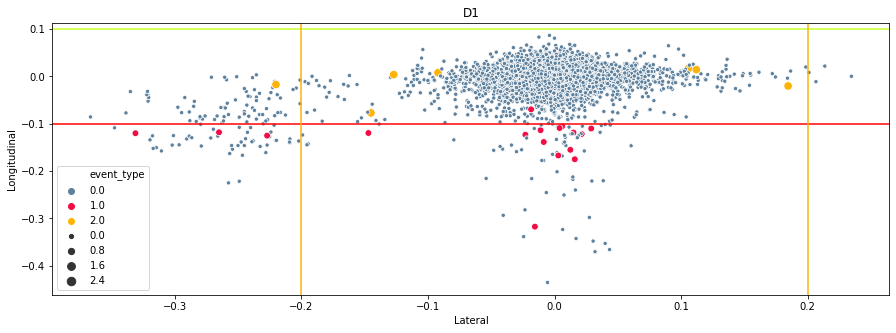

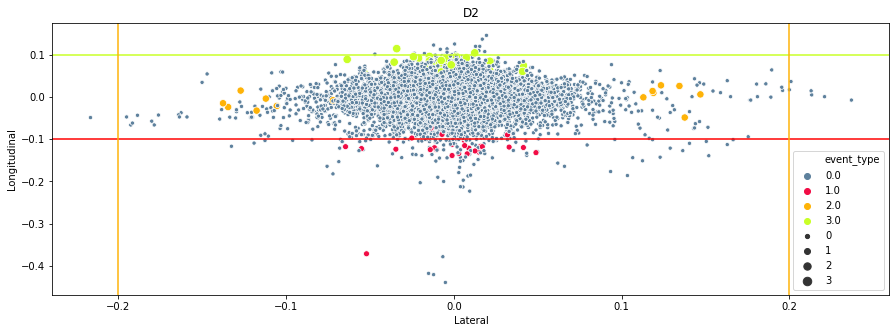

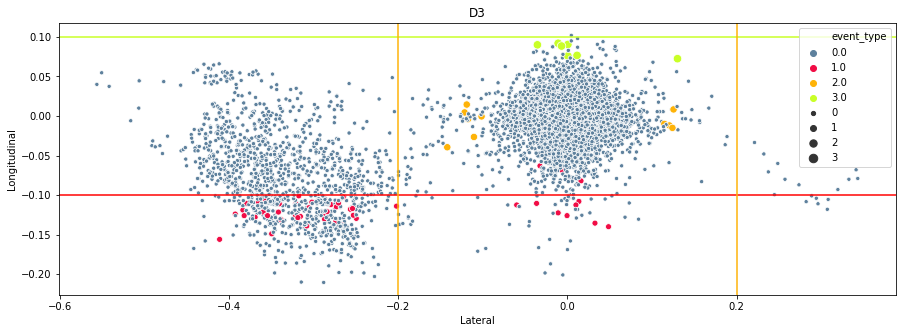

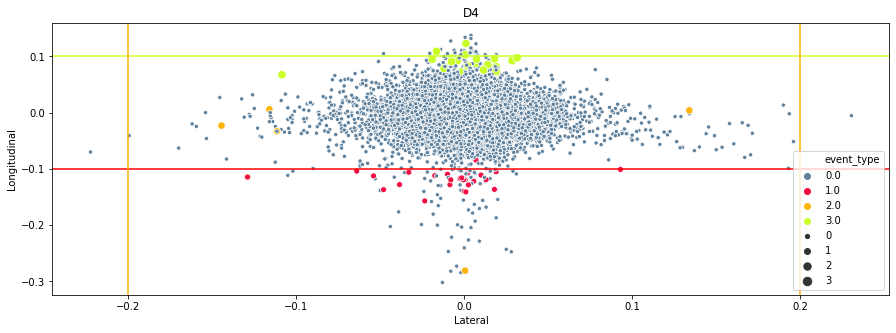

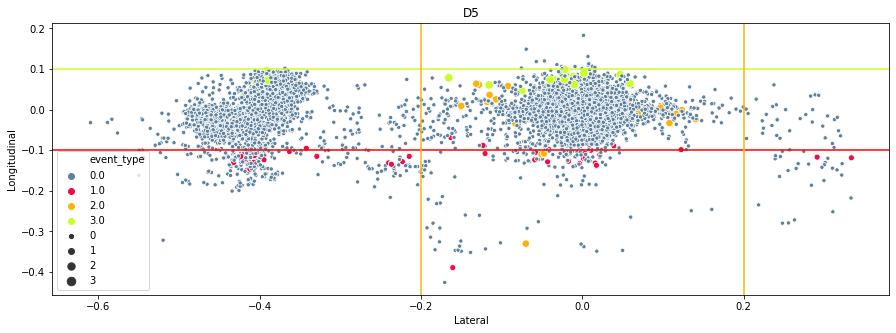

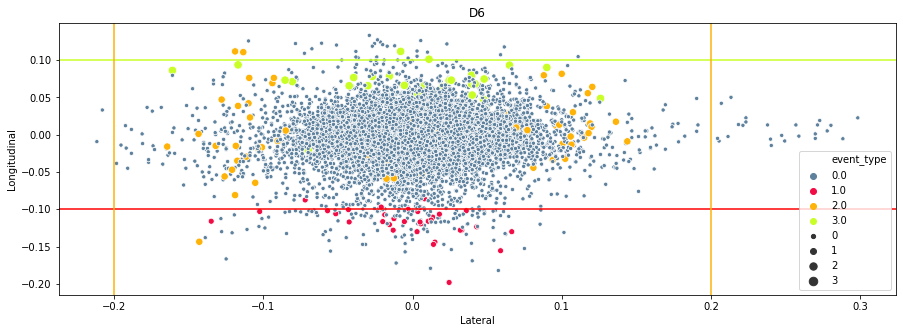

In [3]:
for user in ['D1', 'D2', 'D3', 'D4', 'D5', 'D6']:
    temp_df = uah_df[(uah_df['user_id']==user) & (uah_df['road']=='motorway')]
    palette_n = len(set(temp_df['event_type']))
    palette = ['greyish blue', 'pinkish red', 'amber', 'green yellow'][:palette_n]
    plt.figure(figsize=(15,5))
    plt.title(user)
    sns.scatterplot('ay', 'az', hue='event_type', data=temp_df, size='event_type',
                   palette=sns.xkcd_palette(palette))
    plt.axhline(y=-0.1, c='red')
    plt.axhline(y=0.1, c='#c9ff27')
    plt.axvline(x=-0.2, c='#feb308')
    plt.axvline(x=0.2, c='#feb308')
    plt.xlabel('Lateral')
    plt.ylabel('Longitudinal')
    plt.show()

### Secondary:

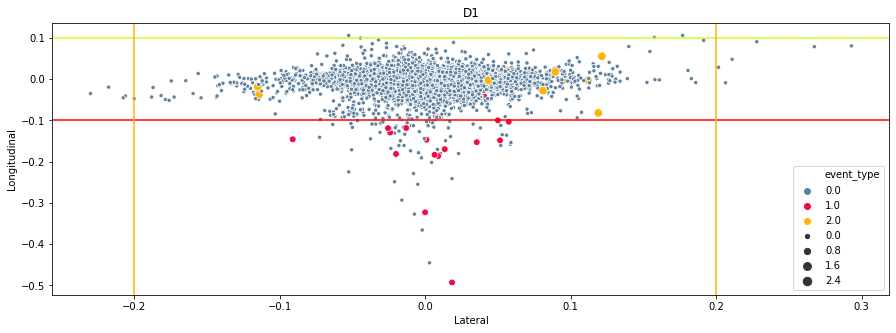

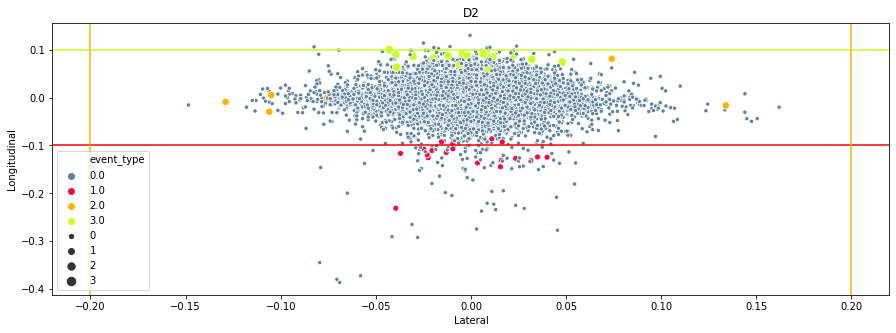

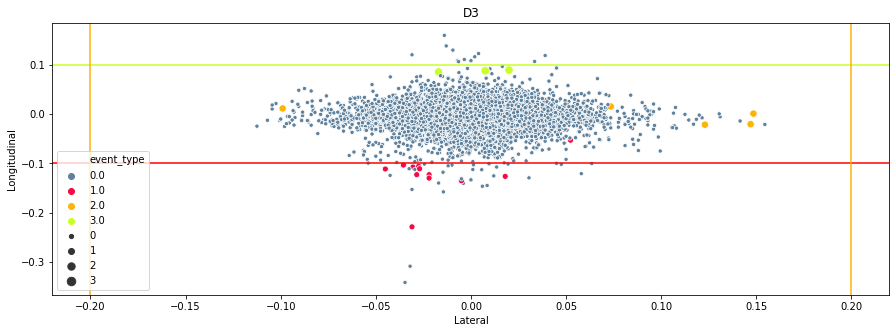

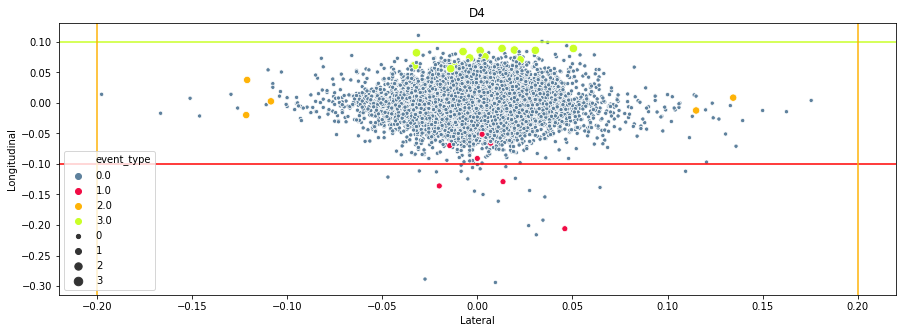

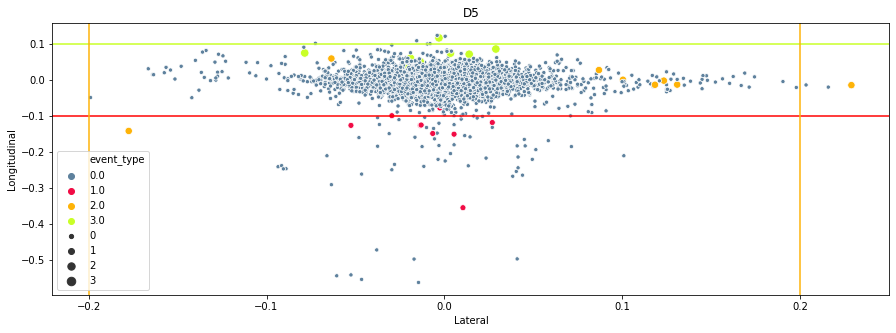

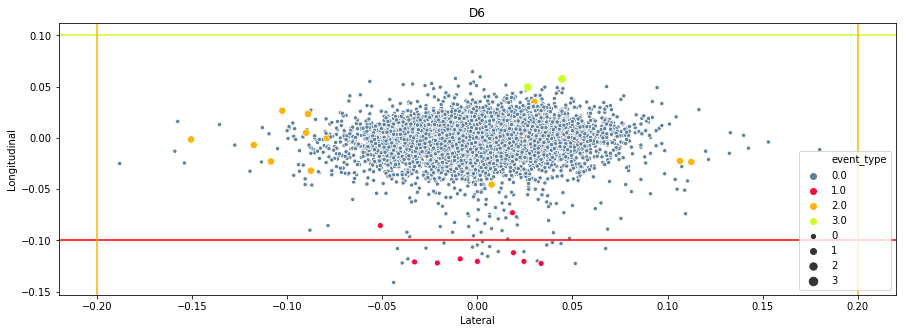

In [4]:
for user in ['D1', 'D2', 'D3', 'D4', 'D5', 'D6']:
    temp_df = uah_df[(uah_df['user_id']==user) & (uah_df['road']=='secondary')]
    palette_n = len(set(temp_df['event_type']))
    palette = ['greyish blue', 'pinkish red', 'amber', 'green yellow'][:palette_n]
    plt.figure(figsize=(15,5))
    plt.title(user)
    sns.scatterplot('ay', 'az', hue='event_type', data=temp_df, size='event_type',
                   palette=sns.xkcd_palette(palette))
    plt.axhline(y=-0.1, c='red')
    plt.axhline(y=0.1, c='#c9ff27')
    plt.axvline(x=-0.2, c='#feb308')
    plt.axvline(x=0.2, c='#feb308')
    plt.xlabel('Lateral')
    plt.ylabel('Longitudinal')
    plt.show()

In the motorway sample, for two drivers, we can see a quite strange distribution of observations. Let's make the brake down by trip:

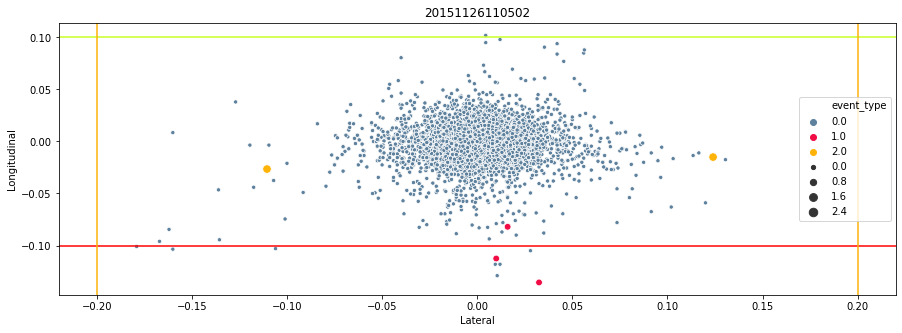

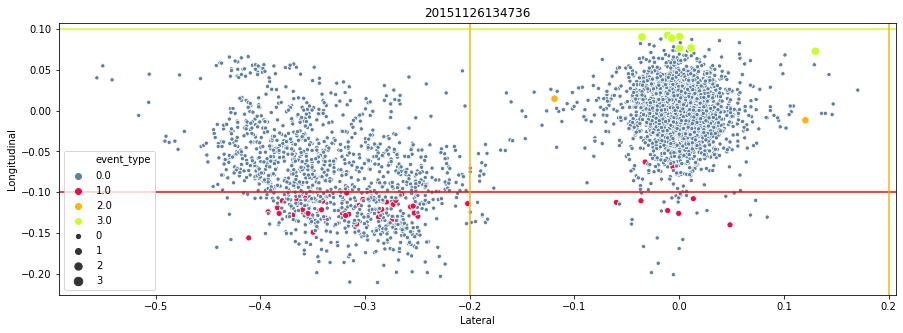

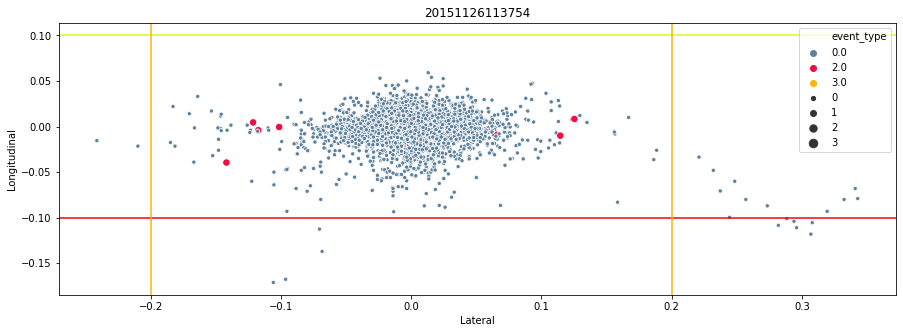

In [5]:
user_D3_df = uah_df[(uah_df['user_id']=='D3') & (uah_df['road']=='motorway')]
for trip in set(user_D3_df['trip_id']):
    temp_df = user_D3_df[uah_df['trip_id']==trip]
    palette_n = len(set(temp_df['event_type']))
    palette = ['greyish blue', 'pinkish red', 'amber', 'green yellow'][:palette_n]
    plt.figure(figsize=(15,5))
    plt.title(trip)
    sns.scatterplot('ay', 'az', hue='event_type', data=temp_df, size='event_type',
                   palette=sns.xkcd_palette(palette))
    plt.axhline(y=-0.1, c='red')
    plt.axhline(y=0.1, c='#c9ff27')
    plt.axvline(x=-0.2, c='#feb308')
    plt.axvline(x=0.2, c='#feb308')
    plt.xlabel('Lateral')
    plt.ylabel('Longitudinal')
    plt.show()

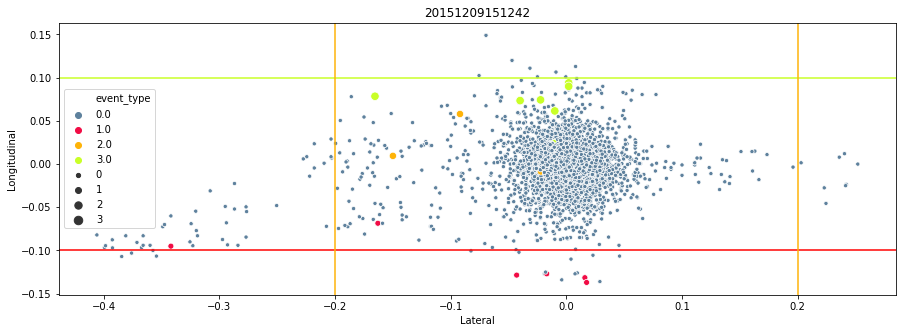

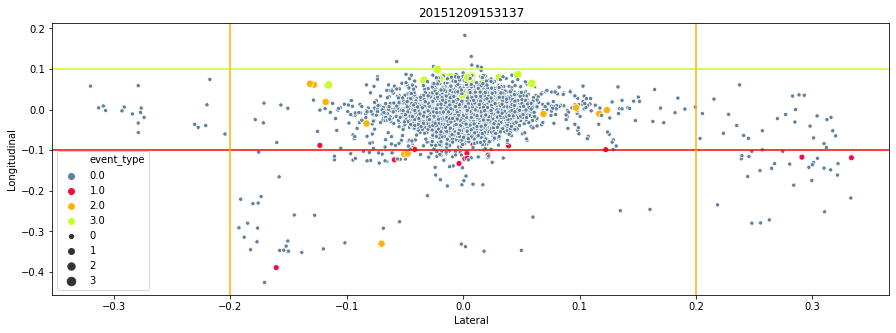

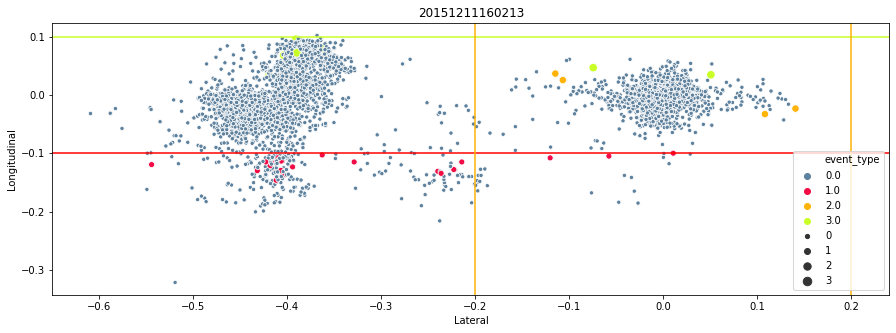

In [6]:
user_D5_df = uah_df[(uah_df['user_id']=='D5') & (uah_df['road']=='motorway')]
for trip in set(user_D5_df['trip_id']):
    temp_df = user_D5_df[uah_df['trip_id']==trip]
    palette_n = len(set(temp_df['event_type']))
    palette = ['greyish blue', 'pinkish red', 'amber', 'green yellow'][:palette_n]
    plt.figure(figsize=(15,5))
    plt.title(trip)
    sns.scatterplot('ay', 'az', hue='event_type', data=temp_df, size='event_type',
                   palette=sns.xkcd_palette(palette))
    plt.axhline(y=-0.1, c='red')
    plt.axhline(y=0.1, c='#c9ff27')
    plt.axvline(x=-0.2, c='#feb308')
    plt.axvline(x=0.2, c='#feb308')
    plt.xlabel('Lateral')
    plt.ylabel('Longitudinal')
    plt.show()

So, in both cases, we conclude that this strange behaviour is unique to a single trip. These are quite strange trips as they start with a out-of-normal negative mean in the lateral acceleration and, after a few minutes, the lateral acceleration returns to more normal values. 

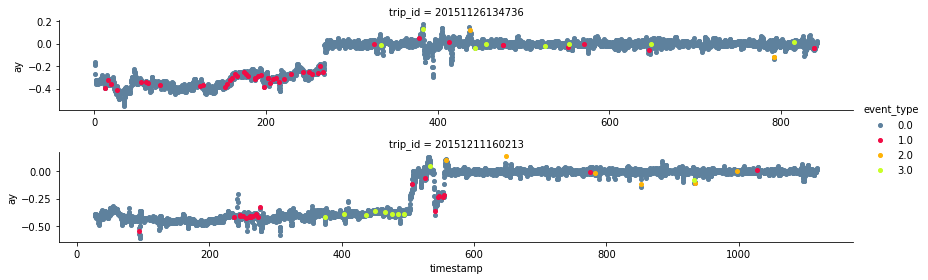

In [7]:
users = ['D3', 'D5']
trips = ['20151211160213', '20151126134736']
temp_df = uah_df.loc[lambda x : (x['trip_id'].isin(trips)) & (x['user_id'].isin(users))]

sns.FacetGrid(temp_df, row="trip_id", hue='event_type', height=2, aspect=6, sharex=False, sharey=False,
                 palette=sns.xkcd_palette(['greyish blue', 'pinkish red', 'amber', 'green yellow'])) \
    .map(plt.plot, "timestamp", "ay", marker=".", markersize=8, linewidth=0) \
    .add_legend()
plt.show()

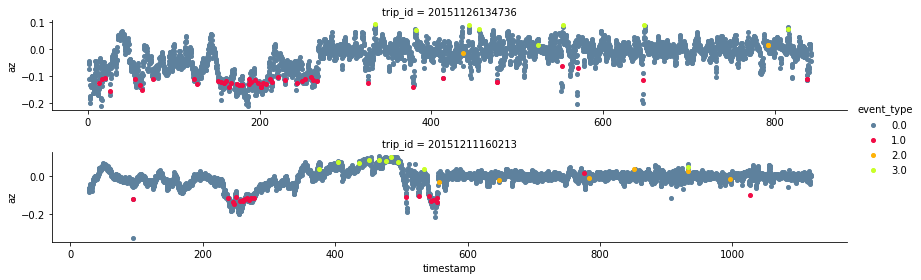

In [8]:
users = ['D3', 'D5']
trips = ['20151211160213', '20151126134736']
temp_df = uah_df.loc[lambda x : (x['trip_id'].isin(trips)) & (x['user_id'].isin(users))]

sns.FacetGrid(temp_df, row="trip_id", hue='event_type', height=2, aspect=6, sharex=False, sharey=False,
                 palette=sns.xkcd_palette(['greyish blue', 'pinkish red', 'amber', 'green yellow'])) \
    .map(plt.plot, "timestamp", "az", marker=".", markersize=8, linewidth=0) \
    .add_legend()
plt.show()